In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


C:\Users\Fabio_UofT SCS\AppData\Local\Temp\ipykernel_5116\283528433.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
for table_name in Base.classes.keys():
    print(table_name)

station
measurement


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print("The most recent date in the data set is:", most_recent_date)

The most recent date in the data set is: 2017-08-23


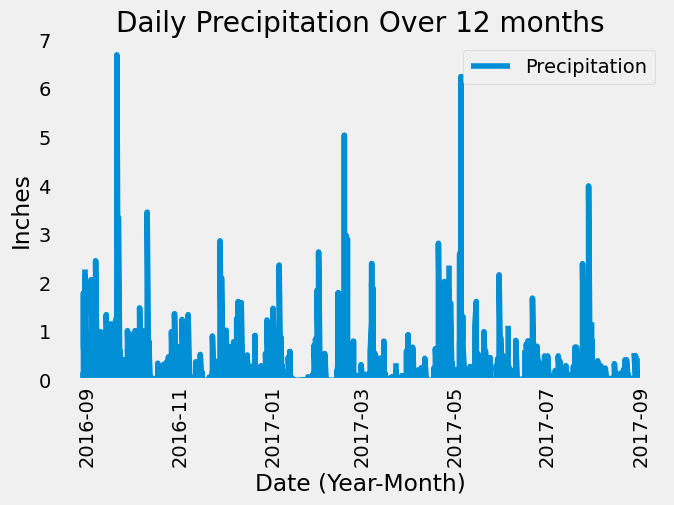

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# get the last 12 months of precipitation data

recent_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()
        
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(recent_prcp, columns = ["Date", "Precipitation"])
prcp_df.set_index("Date", inplace=True)

prcp_df

# convert date column to datetime for formatting in plot

prcp_df.index = pd.to_datetime(prcp_df.index, format="%Y/%m/%d")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_df.plot(figsize=(7,5), ylim=(0,7), title = "Daily Precipitation Over 12 months", rot=90)
prcp_plot.set_ylabel("Inches")
prcp_plot.set_xlabel("Date (Year-Month)")
prcp_plot.grid()
plt.savefig("Images/precipitation_bar.png")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation = prcp_df["Precipitation"].to_frame()
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Measurement.station))).first()[0]
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### The station with the highest number of observations is station USC00519281, with 2772 observations as shown with the observation count in descending order.

In [14]:
# get the last 12 months of temperature observation data for station USC00519281

tobs_station = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()

tobs_station

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [15]:
# convert results to a dataframe for plotting
station_temp_df = pd.DataFrame(tobs_station, columns=["Station", "Temp. Observations"])
station_temp_df

,Station,Temp. Observations
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Calculate the lowest, highest, and average temperature for station USC00519281
station_stats = session.query(
    func.min(Measurement.tobs).label('lowest_temperature'),
    func.max(Measurement.tobs).label('highest_temperature'),
    func.avg(Measurement.tobs).label('average_temperature')
).filter(Measurement.station == "USC00519281").first()

# Access the calculated statistics
lowest_temperature = station_stats.lowest_temperature
highest_temperature = station_stats.highest_temperature
average_temperature = station_stats.average_temperature

# Print the results
print(f"Station USC00519281 Temperature Statistics:")
print(f"Lowest Temperature: {lowest_temperature} F")
print(f"Highest Temperature: {highest_temperature} F")
print(f"Average Temperature: {average_temperature:.2f} F")


Station USC00519281 Temperature Statistics:
Lowest Temperature: 54.0 F
Highest Temperature: 85.0 F
Average Temperature: 71.66 F


<function matplotlib.pyplot.show(close=None, block=None)>

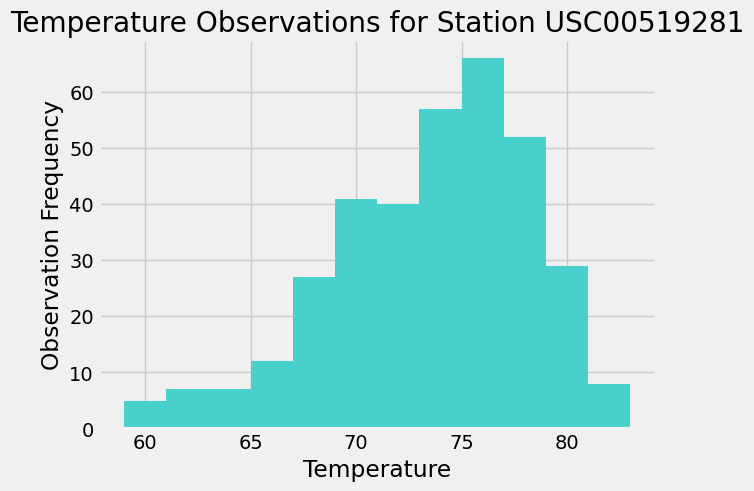

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_df["Temp. Observations"].hist(bins=12, color="mediumturquoise")
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Observation Frequency")
plt.savefig("Images/histogram_tobs.png")
plt.show

# Close Session

In [18]:
# Close Session
session.close()